# Homework 1 (2021) : Data Wrangling and Visualization

Due date : **2021-02-23 @23h55** (this is a **hard deadline**)

## Fill this cell with your names

- Ammour, Wahid, Informatique/Mathématique-Informatique
- Yassine,  Dissem, Informatique/Mathématique-Informatique

## Carefully follow instructions given on the [course homepage](https://stephanegaiffas.github.io/big_data_course/homeworks/)

Write in English or French

- The deliverable is a `xxx.ipynb` file (jupyter notebook) or a `xxx.py` file (if you are using `jupytext`) built by completing the template. **We won't execute the code in your notebook:** all your results, displays and plots must be visible without having to rerun everything.

Once again, follow the steps described here : [course homepage](https://stephanegaiffas.github.io/big_data_course/homeworks/). **If you don't: no evaluation!**

## Grading <i class="fa graduation-cap"></i>

Here is the way we'll assess your work

| Criterion | Points | Details |
|:----------|:-------:|:----|
|Spelling and syntax | 3 | English/French  |
|Plots correction | 3 |  Clarity / answers the question  |
|Plot style and cleanliness | 3 | Titles, legends, labels, breaks ... |
|Table wrangling | 4 | ETL, SQL like manipulations |
|Computing Statistics | 5 | SQL `goup by`  and aggregation  |
|DRY compliance | 2 | DRY principle at [Wikipedia](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)|

If we see a single (or more) `for` loop in your code: **-5 points**.  Everything can be done using high-level `pandas` methods

# Preliminaries

## Notebook: Modus operandi

- This is a [Jupyter Notebook]().
- When you execute code within the notebook, the results appear beneath the code.
- [Jupytext]()

## Packages

- Base `Python` can do a lot. But the full power of `Python` comes from a fast growing collection of `packages`/`modules`.

- Packages are first installed (that is using `pip install` or `conda install`), and if
needed, imported during a session.

- The `docker` image you are supposed to use already offers a lot of packages. You should not need to install new packages.

- Once a package has been installed on your drive, if you want all objects exported by the package to be available in your session, you should import the package, using `from pkg import *`.

- If you just want to pick some sobjects from the package,
you can use qualified names like `pkg.object_name` to access the object (function, dataset, class...)


In [100]:
# importing basic tools
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype

import os            # file operations
import requests      # networking

from datetime import date  # if needed

In [101]:
# importing plotting packages
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [102]:
# make pandas plotly-friendly
np.set_printoptions(precision=2, suppress=True)
%matplotlib inline
pd.options.plotting.backend = "plotly"

# Getting the data

The data are built and made available by [INSEE](https://www.insee.fr/fr/accueil)  (French Governement Statistics Institute)

Prénoms:
- [https://www.insee.fr/fr/statistiques/fichier/2540004/nat2019_csv.zip](https://www.insee.fr/fr/statistiques/fichier/2540004/nat2019_csv.zip)

This dataset has been growing for a while. It has been considered by
social scientists for decades.  Given names are meant to give insights into a variety
of phenomena, including religious observance.

- A glimpse at the body of work can be found in [_L'archipel français_ by Jérome Fourquet, Le Seuil, 2019 ](https://www.seuil.com/ouvrage/l-archipel-francais-jerome-fourquet/9782021406023)

- Read the [File documentation](https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#documentation)

## Download the data

**QUESTION:** Download the data into a file which relative path is `'./nat2019_csv.zip'`

__Hints:__

- Have a look at [`requests`](https://requests.readthedocs.io/en/master/).
- Use magic commands to navigate across the file hierarchy and create subdirectories
when needed

In [103]:
params = dict(
    url = 'https://www.insee.fr/fr/statistiques/fichier/2540004/nat2019_csv.zip',
    dirpath = './',
    timecourse = '',
    datafile = 'nat2019.hdf',
    fpath = 'nat2019_csv.zip'
)

In [104]:
# modify location  make sure you are in the right directory
# %cd
!cd ./
!ls
# %pwd  #
# %ls
# %mkdir # if needed

docker-compose.yml  homework01.ipynb	     notebook03_pandas.ipynb
gro.csv.gz	    nat2019_csv.hdf	     notebook04_pandas.ipynb
gro_cleaned.csv     nat2019_csv.zip
gro_cleaned.pkl     notebook01_python.ipynb


In [105]:
url = params['url']      # 'https://www.insee.fr/fr/statistiques/fichier/2540004/nat2019_csv.zip'
fpath = params['fpath']  # './nat2019_csv.zip'

In [106]:
import requests
import os


r = requests.get(url)
with open(os.path.join(fpath), 'wb') as f:
    f.write(r.content)
    print('Downloaded file %s.' % os.path.join(fpath))






Downloaded file nat2019_csv.zip.


## Load the data in memory

**QUESTION:** Load the data in a `pandas` `DataFrame` called `data`

__Hints:__

- You should obtain a `Pandas dataframe` with 4 columns.
- Mind the conventions used to build theis `csv` file.
- Package `pandas` provides the convenient tools.
- The dataset, though not too large, is already demanding.
- Don't hesitate to test your methods on a sample of rows method `sample()` from class `DataFrame` can be helpful.

In [107]:
data = pd.read_csv(fpath,sep=";")
data

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1340
2,1,_PRENOMS_RARES,1902,1329
3,1,_PRENOMS_RARES,1903,1285
4,1,_PRENOMS_RARES,1904,1427
...,...,...,...,...
652051,2,ZYNEB,2016,6
652052,2,ZYNEB,2017,6
652053,2,ZYNEB,2018,5
652054,2,ZYNEB,2019,7


## Explore the data

**QUESTION:** Look at the data, Use the attributes `columns`, `dtypes` and the methods `head`, `describe`, to get a feeling of the data.

- This dataset is supposed to report all given names used
for either sex during a year in France since 1900

- The file is made of `652 056` lines and  4 columns.

```
|-- preusuel : object
|-- nombre: int64
|-- sexe: int64
|-- annais: object
```

Each row indicates for a given `preusuel` (prénom usuel, given name), `sexe` (sex), and `annais` (année naissance, birthyear) the `nombre` (number) of babies of the given sex who were given that name during the given year.

|sexe    |preusuel     | annais|   nombre|
|:------|:--------|----:|---:|
|2     |SYLVETTE | 1953| 577|
|1   |BOUBOU   | 1979|   4|
|1   |NILS     | 1959|   3|
|2   |NICOLE   | 2003|  36|
|1   |JOSÉLITO | 2013|   4|


**QUESTION:** Compare memory usage and disk space used by data

**Hints:**

- The method `info`  prints a concise summary of a `DataFrame`.
- With optional parameter `memory_usage`, you can get an estimate
of the amount of memory used by the `DataFrame`.
- Beware that the resulting estimate depends on the argument fed.

In [108]:
# your code here
#data.columns
#data.dtypes
#data.head()
#data.describe()
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652056 entries, 0 to 652055
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sexe      652056 non-null  int64 
 1   preusuel  652054 non-null  object
 2   annais    652056 non-null  object
 3   nombre    652056 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 88.5 MB


**QUESTION:** Display the output of `.describe()` with style.

In [109]:
# your code here
data.describe().style.format("{:.2%}").background_gradient()


,sexe,nombre
count,65205600.00%,65205600.00%
mean,154.42%,13170.48%
std,49.80%,89399.86%
min,100.00%,100.00%
25%,100.00%,400.00%
50%,200.00%,800.00%
75%,200.00%,2500.00%
max,200.00%,5362400.00%


**QUESTION:** For each column compute the number of distinct values

In [110]:
# your code here
sexe = data['sexe'].value_counts()
preusuel = data['preusuel'].value_counts()
annais = data['annais'].value_counts()
nombre = data['nombre'].value_counts()


#data.columns
print(sexe)
print(preusuel)
print(annais)
print(nombre)

2    354833
1    297223
Name: sexe, dtype: int64
ALIX              240
ANGE              240
CAMILLE           240
_PRENOMS_RARES    240
DOMINIQUE         238
                 ... 
CATHRINE            1
MAMMA               1
CHEMA               1
LOUIS-EMILE         1
SEHRI               1
Name: preusuel, Length: 34263, dtype: int64
XXXX    35864
2014    13880
2012    13831
2013    13788
2011    13685
        ...  
1915     1690
1918     1654
1919     1642
1917     1639
1916     1554
Name: annais, Length: 121, dtype: int64
3       116404
4        74081
5        51010
6        38107
7        29274
         ...  
2395         1
4952         1
7001         1
9287         1
3910         1
Name: nombre, Length: 7294, dtype: int64


# Transformations

## Improving the data types

**QUESTION:** Make `sexe` a category with two levels `Female` and `Male`. Call the new column `genre`. Do you see any reason why this factor should be ordered?

__Hint:__ Read [Pandas and categorical variables](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html?highlight=category)

In [111]:
# your code here
from pandas.api.types import CategoricalDtype 
sexetype = ['Male','Female']
data['sexe']=data.sexe.astype("category")
data['genre']=data.sexe.cat.rename_categories(sexetype)
data


,sexe,preusuel,annais,nombre,genre
0,1,_PRENOMS_RARES,1900,1250,Male
1,1,_PRENOMS_RARES,1901,1340,Male
2,1,_PRENOMS_RARES,1902,1329,Male
3,1,_PRENOMS_RARES,1903,1285,Male
4,1,_PRENOMS_RARES,1904,1427,Male
...,...,...,...,...,...
652051,2,ZYNEB,2016,6,Female
652052,2,ZYNEB,2017,6,Female
652053,2,ZYNEB,2018,5,Female
652054,2,ZYNEB,2019,7,Female


In [112]:

# 

**QUESTION:** Compare memory usage of columns `sexe` and `genre`

In [113]:
# your code here
s=data.sexe.memory_usage(deep=True)
m=data.genre.memory_usage(deep=True)
print(s)
print(m)

652308
652416


**QUESTION:** Would it be more memory-efficient to recode `sexe` using modalities `F` and `M` instead of `Male` and `Female` ?

_Insert your answer here_

> Yes it will be more memory-efficient if we used F and M instead of Male and Female 

## Dealing with missing values

**QUESTION:** Variable `annais` class is `object`. Make `annais` of type `float`. Note that missing years are encoded as "XXXX", find a way to deal with that.

__Hint:__  As of releasing this Homework (2021-01-22), `Pandas` is not very good at managing missing values,
see [roadmap](https://pandas.pydata.org/docs/development/roadmap.html). Don't try to convert `annais` into an integer column.

In [114]:
# your code here
data = data.replace('XXXX',np.nan)
data['annais'] = data['annais'].astype(float)
data

,sexe,preusuel,annais,nombre,genre
0,1,_PRENOMS_RARES,1900.0,1250,Male
1,1,_PRENOMS_RARES,1901.0,1340,Male
2,1,_PRENOMS_RARES,1902.0,1329,Male
3,1,_PRENOMS_RARES,1903.0,1285,Male
4,1,_PRENOMS_RARES,1904.0,1427,Male
...,...,...,...,...,...
652051,2,ZYNEB,2016.0,6,Female
652052,2,ZYNEB,2017.0,6,Female
652053,2,ZYNEB,2018.0,5,Female
652054,2,ZYNEB,2019.0,7,Female


## Rename and remove columns

**QUESTION:** Remove useless columns (now that you've created new ones, and rename them). You should end up with a dataframe with columns called `"gender"`, `"year"`, `"count"`, `"firstname`" with the following dtypes:

```python
gender        category
firstname     object
count         int64
year          float64
```

In [115]:
# your code here
data = data.drop('sexe',1)
data = data.rename(columns={'genre':'gender','preusuel':'firstname','annais':'year','nombre':'count'})
data


,firstname,year,count,gender
0,_PRENOMS_RARES,1900.0,1250,Male
1,_PRENOMS_RARES,1901.0,1340,Male
2,_PRENOMS_RARES,1902.0,1329,Male
3,_PRENOMS_RARES,1903.0,1285,Male
4,_PRENOMS_RARES,1904.0,1427,Male
...,...,...,...,...
652051,ZYNEB,2016.0,6,Female
652052,ZYNEB,2017.0,6,Female
652053,ZYNEB,2018.0,5,Female
652054,ZYNEB,2019.0,7,Female


**QUESTION:** How many missing values (NA) have been introduced? How many births are concerned?

In [116]:
# your code here
sum(data[data['year'].isnull()]['count'])


821477

**QUESTION:** Read the documentation and describe the origin of rows containing the missing values.

In [117]:
# your code here
#The numbers of first names that do not meet conditions 1 and 2 are grouped together (for each sex and each year of birth) in a record whose first name field (PREUSUAL) takes the value "_PRENOMS_RARES_". The numbers of first names fulfilling condition 2 but not condition 3 are grouped together (for each sex and each first name) in a record whose year of birth field (ANNAIS) takes the value "XXXX".


## Checkpointing: save your transformed dataframe

**QUESTION:** Save the transformed dataframe (retyped and renamed) to `./nat2019_csv.zip`. Try several compression methods.

In [118]:
# your code here
data.to_csv('nat2019_csv.zip', compression='zip')



/usr/lib/python3.8/zipfile.py:1517: UserWarning:

Duplicate name: 'nat2019_csv.zip'



**QUESTION:** Save the transformed dataframe (retyped and renamed) to `./nat2019.hdf` using `.hdf` format

In [119]:
# your code here

#!pip install pytables

#nikmok = data.to_hdf('./nat2019_csv.hdf',key="df",mode='w')


At that point your working directory should look like:

```
├── hmw_1.py      # if you use `jupytext`
├── hmw_1.ipynb
├── nat2019.hdf
├── nat2019_csv.zip
```

**QUESTION:** Reload the data using `read_hdf(...)` so that the resulting dataframe  is properly typed with meaningful column names.

__Hint:__ use `try: ... except` to handle exceptions such as `FileNotFoundError`

In [120]:
# your code here
!ls

docker-compose.yml  homework01.ipynb	     notebook03_pandas.ipynb
gro.csv.gz	    nat2019_csv.hdf	     notebook04_pandas.ipynb
gro_cleaned.csv     nat2019_csv.zip
gro_cleaned.pkl     notebook01_python.ipynb


## Some data "analytics" and visualization

**QUESTION**: For each year, compute the total number of Female and Male births and the proportion of Female  births among total births

__Hints:__

- Groupby operations using several columns for the groups return a dataframe with a `MultiIndex` index see [Pandas advanced](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

- Have a look at `MultiIndex`, `reset_index`, `pivot`, `columns.droplevel`

In [121]:
# your code here

genders = data.pivot_table(index='year',columns='gender',values='count',aggfunc=np.sum)
genders
ratio = genders['Female']/(genders['Female']+genders['Male'])
genders = pd.concat([genders, ratio], axis=1)
genders.columns = ['Male','Female','Ratio']
genders

,Male,Female,Ratio
year,,,
1900.0,177382,237651,0.572607
1901.0,195946,257492,0.567866
1902.0,204338,261437,0.561295
1903.0,207347,261448,0.557702
1904.0,214118,264821,0.552933
...,...,...,...
2015.0,397938,378701,0.487615
2016.0,390195,370895,0.487321
2017.0,382867,364184,0.487495


**QUESTION:** Plot the proportion of female births as a function of year. Don't forget: title, axes labels, ticks, scales, etc.

Because of what we did before, the `plot` method of a `DataFrame` with be rendered using `plotly`, so you can use this. But you can use also `seaborn` or any other available plotting library that you want.

__Hint:__ Mind the missing values in the `year` column

[]

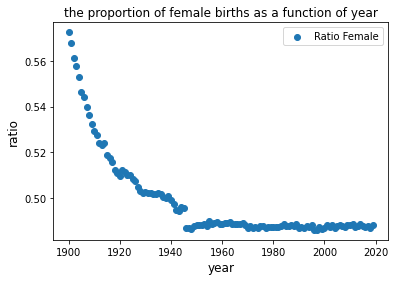

In [122]:
# your code here
#plot=genders.plot(title='the proportion of female births as a function of year',y='Ratio')
#plot.legend(loc='upper left')
import matplotlib.pyplot as plt
plt.scatter( genders.index,genders["Ratio"])
a=plt.ylabel("ratio", fontsize=12)
b=plt.xlabel("year", fontsize=12)
plt.title('the proportion of female births as a function of year')
plt.legend(['Ratio Female'])
plt.plot()

**QUESTION:** Make any sensible comment about this plot.

_Insert your answer here_

> We clearly see that the ratio of female births is decreasing.

**QUESTION:** Explore the fluctuations of sex ratio around its mean value since 1945.
Plot deviations of sex ratio around its mean since 1945 as a function of time.

[]

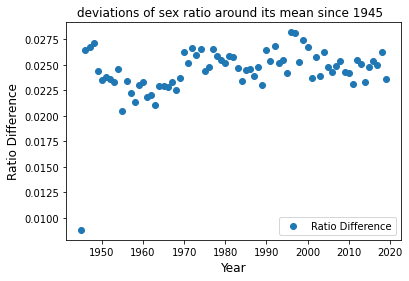

In [123]:
# your code here
sex = genders[genders.index>=1945]
ratio_M = sex['Male']/(sex['Female']+sex['Male'])
sex = pd.concat([sex, ratio_M], axis=1)
sex.columns = ['Male','Female','Ratio_F','Ratio_M']

plt.scatter( sex.index,sex["Ratio_M"]-sex["Ratio_F"])
a=plt.ylabel("Ratio Difference", fontsize=12)
b=plt.xlabel("Year", fontsize=12)
plt.title('deviations of sex ratio around its mean since 1945  ')
plt.legend(['Ratio Difference'])
plt.plot()




# Popular firstnames

## The top-20 most popular firstnames since 1900

**QUESTION:** For each firstname and sex (some names may be given to girls and boys), compute the total number of times this firstname has been given during `1900-2019`. Print the top 20 firstnames given and style your result dataframe using `background_gradient` for instance.

In [124]:
# your code here
top_names = data.groupby("firstname").sum()['count']
top_names=top_names.sort_values(ascending=False)
top_names20=top_names.head(20)
top_names20

firstname
MARIE             2259152
JEAN              1915099
_PRENOMS_RARES    1613924
PIERRE             892162
MICHEL             820478
ANDRÉ              712475
JEANNE             557730
PHILIPPE           538708
LOUIS              521603
RENÉ               516616
ALAIN              506932
JACQUES            482857
BERNARD            469359
CLAUDE             468391
MARCEL             468186
DANIEL             435456
ROGER              423780
ROBERT             419250
PAUL               419186
DOMINIQUE          409944
Name: count, dtype: int64

## Rare firstnames

**QUESTION:** For each sex, plot the proportion of births given `_PRENOMS_RARES` as a function of the year.

gender,Male,Female
year,,
1900.0,0.419886,0.580114
1901.0,0.430315,0.569685
1902.0,0.431914,0.568086
1903.0,0.421588,0.578412
1904.0,0.440568,0.559432
...,...,...
2015.0,0.479567,0.520433
2016.0,0.481821,0.518179
2017.0,0.482825,0.517175


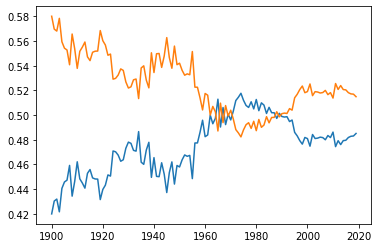

In [125]:
# your code here
# plot gender ratio evolution of years
def transname(df, name):
    selection = df[df["firstname"] == name]
    gender = selection.pivot_table(index='year',
                                   columns='gender',
                                   values='count')
    gender = gender.div(gender.sum(axis=1), axis=0)
    plt.plot(gender)
    return gender
transname(data,"_PRENOMS_RARES")


# A study of the "Marie" firstname

**QUESTION:** Plot the proportion of female births given name `'MARIE'` or `'MARIE-...'` (compounded names) as a function of the year.
Proceed in such a way that the reader can see the share of compounded names. We are expecting an _area plot_.

__Hints:__

- Have a look at the `.str` accessor (to apply a string method over a whole column containing string)
- Have a look at [r-graph-gallery: stacked area](https://www.r-graph-gallery.com/stacked-area-graph.html)  and
at [ggplot documentation](https://ggplot2.tidyverse.org/reference/geom_ribbon.html). Pay attention on the way you stack the area corresponding to names matching pattern 'MARIE-.*' over or under the are corresponding to babies named 'MARIE'
- See Graphique 3, page 48, de _L'archipel français_  de J. Fourquet. Le Seuil. Essais. Vol. 898.

- Add annotation, 1st World War, Front Populaire, 2nd World War, 1968

In [129]:
marie = data[data["firstname"].str.startswith("MARIE-",na=False)|(data["firstname"]=="MARIE")]
marie = marie[marie["gender"]=='Female']
t = marie.pivot_table(index='year',columns='firstname',values='count')
t = t.div(t.sum(axis=1), axis=0)
t.plot()


# Top 10 firstnames of year 2000

**QUESTION:** For each sex, select the ten most popular names in year 2000, and plot the proportion
of newborns given that name over time. Take into account that some names might have
zero occurrence during certain years.

__Hint:__ Leave aside the rows with '_PRENOMS_RARES'.

In [127]:
# your code here
import seaborn as sns

data = data.replace('_PRENOMS_RARES',np.nan)
data.dropna(inplace=True)
data2 = data[data["year"]==2000]
top_names1 = data2.sort_values(by=["gender","count"],ascending=False)

top_names1M= top_names1[top_names1["gender"]=="Male"]
top_names1F= top_names1[top_names1["gender"]=="Female"]
top_names1M=top_names1M["firstname"]
top_names1F=top_names1F["firstname"]
top_names1F=top_names1F.head(10).reset_index()
top_names1M=top_names1M.head(10).reset_index()
top = pd.concat([top_names1M, top_names1F], axis=1)
top = top.drop('index',1)
top.columns = ['Male','Female']
top






,Male,Female
0,THOMAS,LÉA
1,LUCAS,MANON
2,THÉO,CAMILLE
3,HUGO,CHLOÉ
4,MAXIME,EMMA
5,NICOLAS,MARIE
6,QUENTIN,OCÉANE
7,ALEXANDRE,SARAH
8,ANTOINE,LAURA
9,CLÉMENT,MATHILDE


# Getting help

- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/)

- [plotly](https://plotly.com/python/) for animated plots

- [stackoverflow](https://stackoverflow.com)

- [stackoverflow: pandas](https://stackoverflow.com/questions/tagged/pandas)

- [stackoverflow: plotly+python](https://stackoverflow.com/questions/tagged/plotly+python)

- The US `babynames` analogue of the INSEE file has been a playground for data scientists,
 see [https://github.com/hadley/babynames](https://github.com/hadley/babynames)

- Don't Repeat Yourself (DRY) principle  at [Wikipedia](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself)